In [1]:
import numpy as np                # numerical calculation
import matplotlib.pyplot as plt   # plotting
from scipy.interpolate import Rbf # mathemathical functions and utlities
import seaborn as sns             # enhanced plotting on top of matplotlib

In [2]:
class newrb:
    def __init__(self, X, T, hidden_shape=8, sigma=1.0):

        # number of hidden neurons
        self.hidden_shape = hidden_shape
        
        # sigma for the rbf function
        self.sigma = sigma

        # the rbf model centers
        self.centers = None

        # allocate space for saving model weights
        self.weights = None

        # fit the model immidealty to update the weights and be able to predict new data
        self.fit(X, T)


    # the rbf function which uses the random center and the predefined sigma
    # to calculate the output
    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    # for each center calculate the kernel
    def _calculate_interpolation_matrix(self, x):
        matrix = np.zeros((len(x), self.hidden_shape))
        for data_point_arg, data_point in enumerate(x):
            for center_arg, center in enumerate(self.centers):
                matrix[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return matrix

    # select the centers randomly using numpy choice
    def _select_centers(self, y):
        random_args = np.random.choice(len(y), self.hidden_shape)
        centers = y[random_args]
        return centers

    # functions that fits the model to the data
    # by calculating the intepolation matrix
    # and then computing the weights using the pseudo inverse
    def fit(self, x, y):
        self.centers = self._select_centers(x)
        matrix = self._calculate_interpolation_matrix(x)
        self.weights = np.dot(np.linalg.pinv(matrix), y)

    # predict new data
    def predict(self, x):
        matrix = self._calculate_interpolation_matrix(x)
        predictions = np.dot(matrix, self.weights)
        return predictions

In [3]:
def netPeformance(T, Y):
  fig, axs = plt.subplots(2, 2, figsize=(12, 12))

  # plot the targest and the predictions
  axs[0, 0].plot(T, 'b')
  axs[0, 0].plot(Y, '-.r')
  axs[0, 0].legend(['Targets','Network outputs'])
  axs[0, 0].set_title('Targets data vs Network outputs')
  axs[0, 0].set_xlabel('sample number')
  axs[0, 0].set_ylabel('data')
  axs[0, 0].grid(linewidth=1)

  # plot the network outputs vs the targets
  line_data1 = np.minimum(T.flatten(), Y.flatten())
  line_data2 = np.maximum(T.flatten(), Y.flatten())
  axs[1, 0].plot(line_data1, line_data2, 'b')
  axs[1, 0].plot(T, Y, 'ko')
  axs[1, 0].legend(['Targets','Network outputs'])

  # calculate target and prediction correlation to see their similarity
  corr = f"R: {np.mean(np.corrcoef(T.reshape(1, -1), Y.flatten())):.3f}"
  axs[1, 0].set_title(corr)
  axs[1, 0].set_xlabel('target values')
  axs[1, 0].set_ylabel('network outputs')
  axs[1, 0].grid(linewidth=1)

  # calculate absolute error value
  errorAbsValue = T - Y
  errorMean = np.mean(errorAbsValue)
  errorStd = np.std(errorAbsValue)

  axs[0, 1].plot(errorAbsValue, 'b')
  axs[0, 1].set_title(f"RMSE: {np.sqrt(np.mean(np.square(errorAbsValue)))}")
  axs[0, 1].set_xlabel('sample number')
  axs[0, 1].set_ylabel('absolute error')
  axs[0, 1].grid(linewidth=1)

  #hist
  axs[1, 1].hist(errorAbsValue, density=True)
  axs[1, 1].set_title(f"mean: {errorMean:.7f}, std: {errorStd:.5f}")
  axs[1, 1].set_xlabel('Frequency')
  axs[1, 1].set_ylabel('error')
  axs[1, 1].grid(linewidth=1)

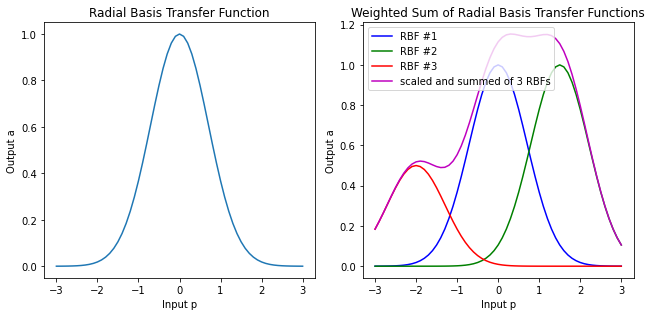

In [4]:
# define the radbas function
def radbas(arr):
  return np.exp(-arr ** 2)

# create the array given the steps
x = np.linspace(start=-3, stop=3, num=61, retstep=False)
a = radbas(x)

# create diffenet summations of the rbf function
a1 = radbas(x)
a2 = radbas(x - 1.5)
a3 = 0.5 * radbas(x + 2)
a4 = a1 + a2 + a3

# Get perception on the RBF function and how a summation of different kernels affects data
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))

axs[0].plot(x, a)
axs[0].set_title('Radial Basis Transfer Function')
axs[0].set_xlabel('Input p')
axs[0].set_ylabel('Output a')

axs[1].plot(x, a1, 'b-', x, a2, 'g-', x, a3, 'r-', x, a4, 'm-')
axs[1].set_title('Weighted Sum of Radial Basis Transfer Functions');
axs[1].set_xlabel('Input p');
axs[1].set_ylabel('Output a');
axs[1].legend(['RBF #1','RBF #2','RBF #3','scaled and summed of 3 RBFs'])

fig.tight_layout()

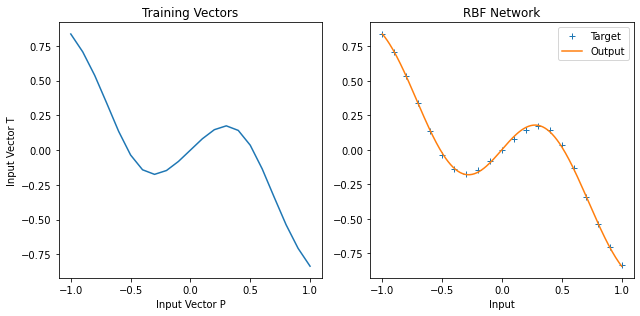

In [5]:
# RBF Learning demo
# data preperation
X = np.linspace(start=-1, stop=1, num=21, retstep=False)
T = X * np.sin(np.cos(3 * X))

# RBF training
goal = 0.001   # set the mse goal
spread = 1     # model spread
MN = 8         # number of neurons (RBFs)
net = newrb(X, T, hidden_shape=8, sigma=spread)

# RBF validation
X_test = np.linspace(start=-1, stop=1, num=201, retstep=False)
Y_hat = net.predict(X_test)

# visualize the results
fig, axs = plt.subplots(1, 2, figsize=(9, 4.5))

# plot the targets and the predictions
axs[0].plot(X, T)
axs[0].set_title("Training Vectors")
axs[0].set_xlabel('Input Vector P')
axs[0].set_ylabel('Input Vector T')

axs[1].plot(X, T, '+')
axs[1].set_xlabel('Input')
axs[1].plot(X_test, Y_hat)
axs[1].legend(['Target', 'Output'])
axs[1].set_title('RBF Network')
fig.tight_layout()

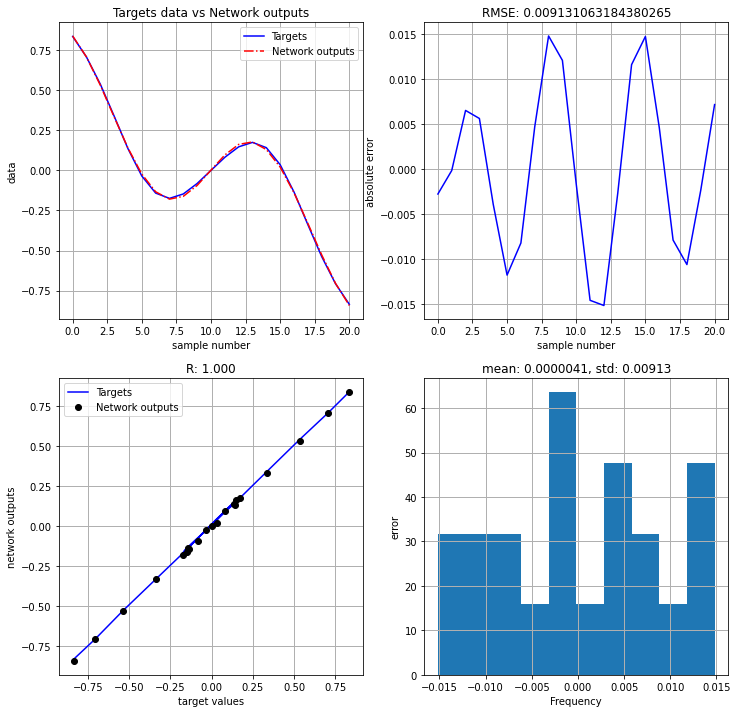

In [6]:
# validate the network
netPeformance(T, net.predict(X))